In [1]:
from tqdm import tqdm
import numpy as np
from sklearn.datasets import load_iris

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

# 1. The iris dataset

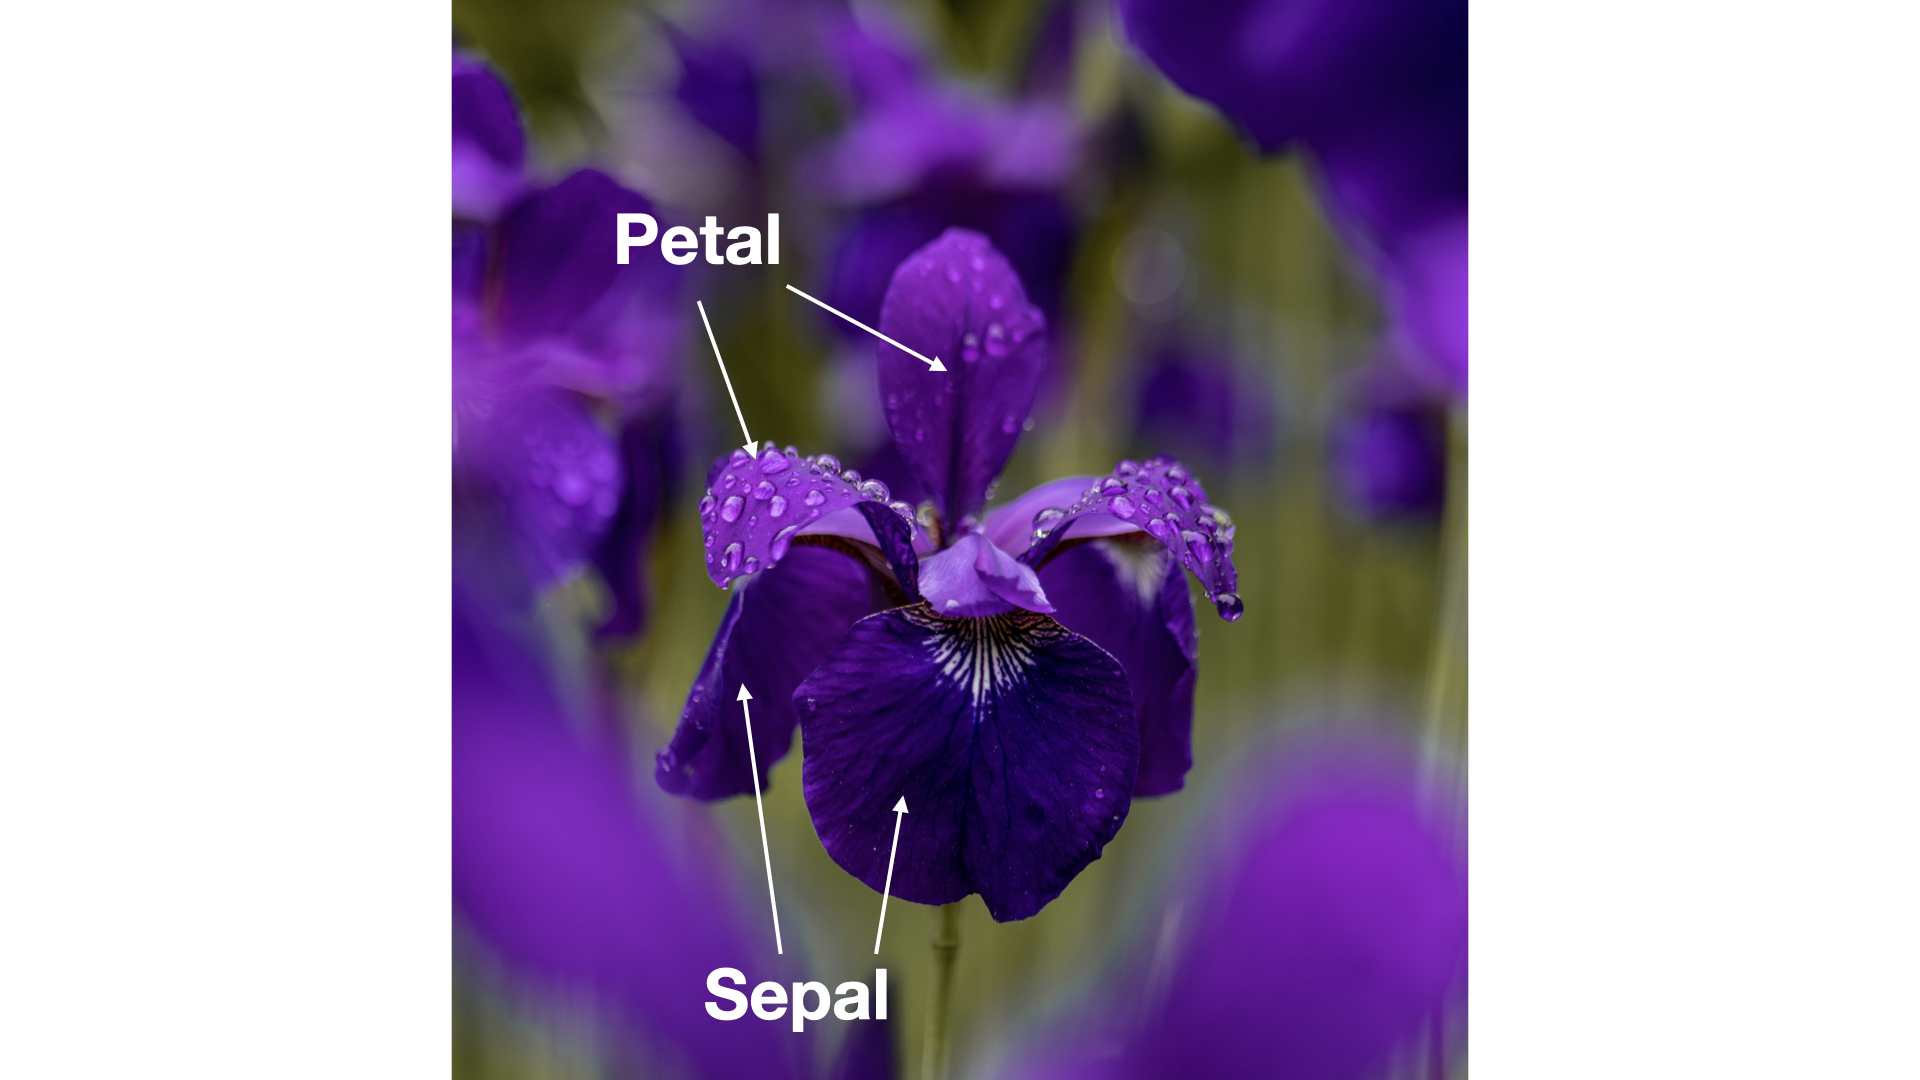

In [2]:
Image(filename='materials/images/free-use/Iris_data.png')

adapted from: https://www.pexels.com/search/iris%20flower/

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
data['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

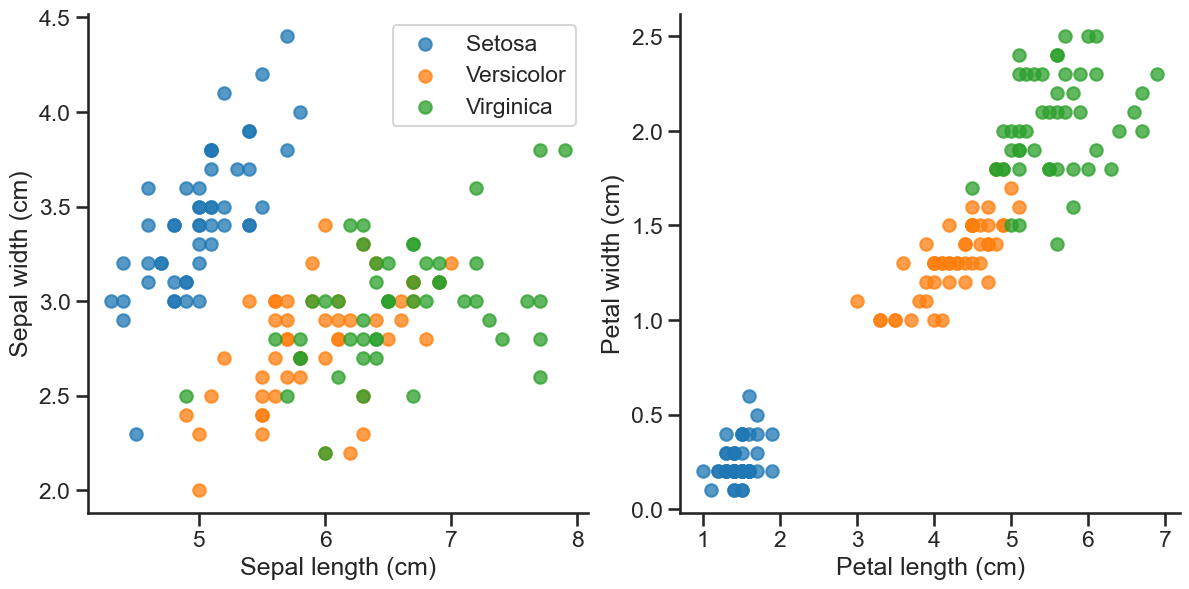

In [8]:
fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=100)
for i, iris_type in enumerate(data['target_names']):
    idx = data['target']==i
    # sepal length / width
    axs[0].scatter(data['data'][idx,0], data['data'][idx,1],
                   color='C{}'.format(i),
                   alpha=0.75,
                   label=iris_type.capitalize())
    # petal length / width
    axs[1].scatter(data['data'][idx,2], data['data'][idx,3],
                   color='C{}'.format(i),
                   alpha=0.75,
                   label=iris_type.capitalize())

axs[0].set_xlabel(data['feature_names'][0].capitalize())    
axs[0].set_ylabel(data['feature_names'][1].capitalize()) 
axs[1].set_xlabel(data['feature_names'][2].capitalize())    
axs[1].set_ylabel(data['feature_names'][3].capitalize()) 
axs[0].legend(loc='upper right')
for ax in axs:
    despine(ax=ax)

fig.tight_layout()
fig.savefig('figures/Figure-0-1_Iris-Data.png', dpi=600)

# 2. A simple classification task:
## Use petal length and width to distinguish setosa and versicolor irises

In [9]:
# subset our data to only include the petal length and width for setosa and versicolor irises
idx = np.isin(data['target'], (0, 1))
X = data['data'][idx,2:4]
y = data['target'][idx]
feature_names = data['feature_names'][2:4]

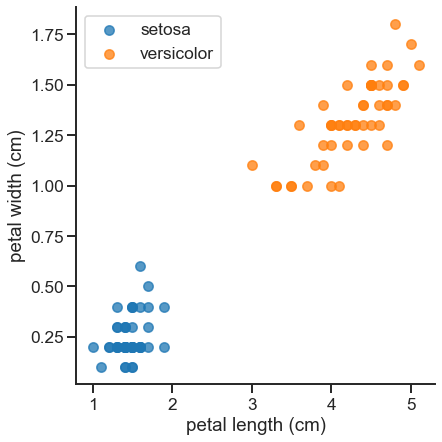

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=75)
for cl in np.unique(y):
    ax.scatter(x=X[y==cl,0],
               y=X[y==cl,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=0.75)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-2_Setosa-Versicolor-Petal.png', dpi=600)

# 3. The perceptron

## 3.1 Its biological inspiration

Neurons as the subunits of a neural network in a biological brain. 

The signals of variable magnitudes arrive at the dendrites. Those input signals are then accumulated in the cell body of the neuron, and if the accumulated signal exceeds a certain threshold, a output signal is generated that which will be passed on by the axon.

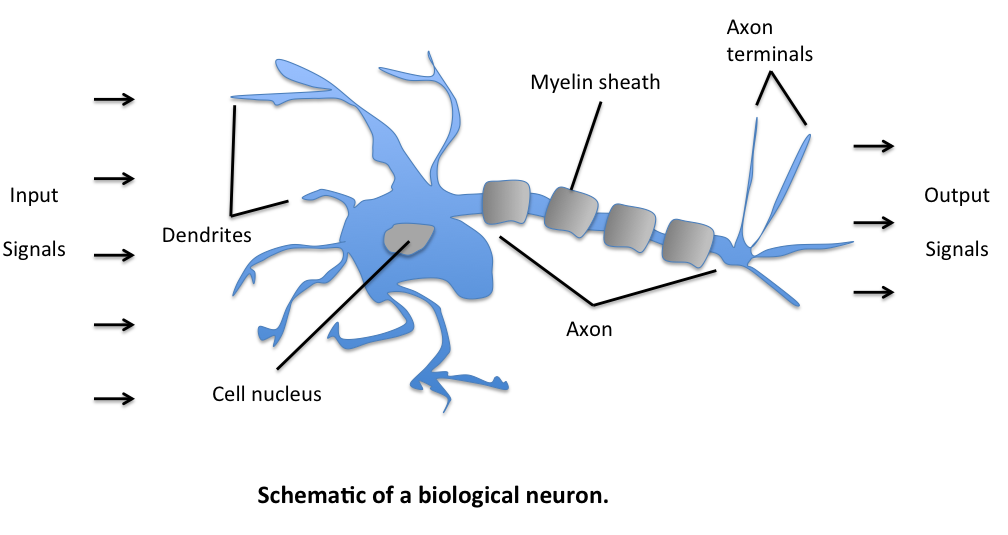

In [11]:
Image(filename='materials/images/free-use/perceptron_neuron.png')

source: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

## 3.2 How it is implemented

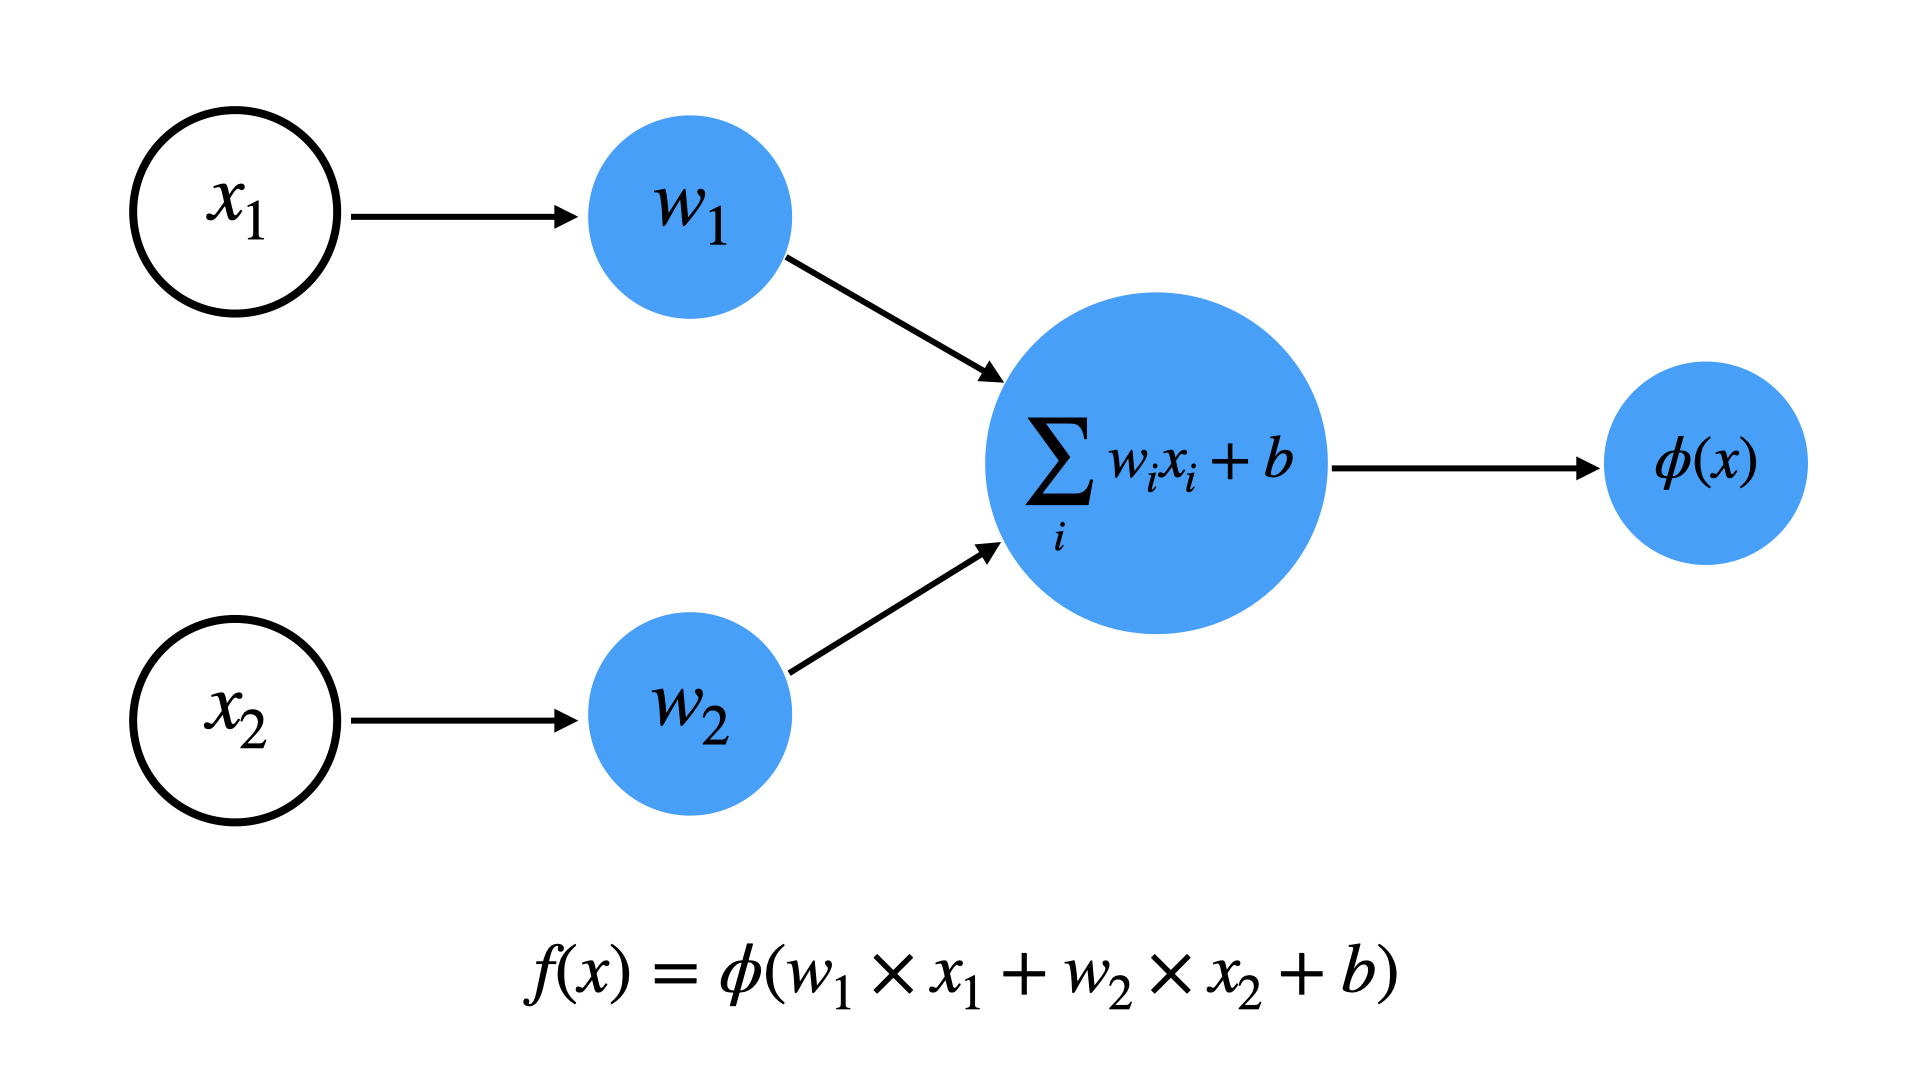

In [12]:
Image(filename='materials/images/free-use/perceptron.png')

### The activation function $\phi$:

In [13]:
def step(x):
    xout = np.ones_like(x)
    xout[x<0] = -1
    return xout

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x)) 

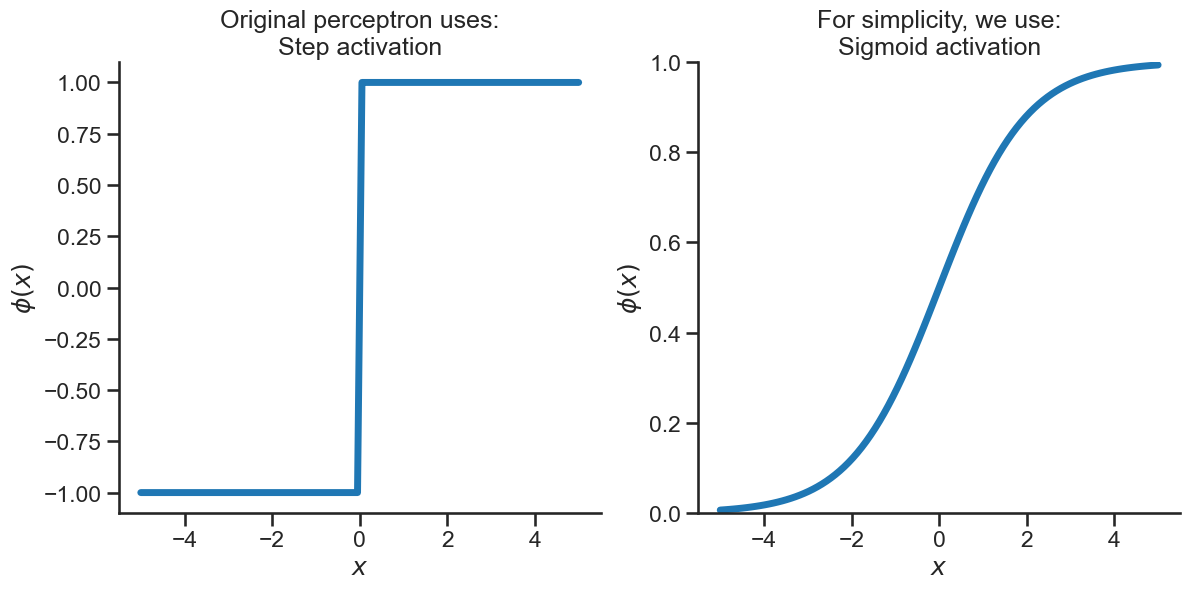

In [14]:
fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=100)
x = np.linspace(-5,5,100)

axs[0].set_title('Original perceptron uses:\nStep activation')
axs[0].plot(x, step(x), lw=5)
axs[0].set_ylabel(r'$\phi(x)$')
axs[0].set_xlabel(r'$x$')

axs[1].set_title('For simplicity, we use:\nSigmoid activation')
axs[1].plot(x, sigmoid(x), lw=5)
axs[1].set_ylabel(r'$\phi(x)$')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylim(0, 1)

for ax in axs:
    despine(ax=ax)
fig.tight_layout()
fig.savefig('figures/Figure-0-3_Perceptron-Activation.png', dpi=600)

### How can we find the parameters $w$ that best discriminate between setosa and versicolor irises?

/opt/miniconda3/envs/dlworkshop/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/miniconda3/envs/dlworkshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


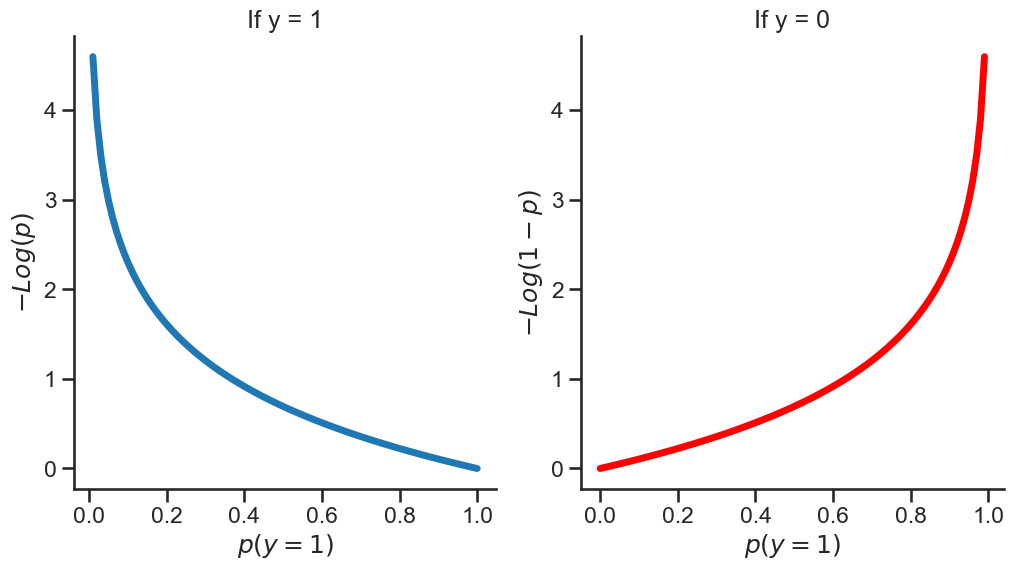

In [41]:
fig, axs = plt.subplots(1,2,figsize=(12,6),dpi=100)

p = np.linspace(0,1,100)

axs[0].plot(p, -np.log(p), lw=5)
axs[0].set_title('If y = 1')
axs[0].set_ylabel(r'$-Log(p)$')
axs[0].set_xlabel(r'$p(y=1)$')
(despine(ax=axs[0]))

axs[1].plot(p, -np.log(1-p), lw=5, color='red')
axs[1].set_title('If y = 0')
axs[1].set_ylabel(r'$-Log(1-p)$')
axs[1].set_xlabel(r'$p(y=1)$')
(despine(ax=axs[1]))

fig.savefig('figures/Figure-0-4_Cross-Entropy-Loss.png', dpi=600)

cross entropy loss identical to : https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/

### Our perceptron implementation:

In [16]:
class Perceptron:
    
    def __init__(self, n_in, activation=sigmoid, b=None):
        self.w = np.random.uniform(-1,1,n_in)
        if b is None:
            self.b = np.random.uniform(-1,1,1)
            self.fit_b = True
        else:
            self.b = b
            self.fit_b = False
        self.activation = activation

    def predict(self, x):
        self.Z = np.dot(x, self.w) + self.b
        self.A = self.activation(self.Z)
        return self.A
    
    def loss(self, x, y, zerotol=1e-10):
        # cross entropy loss:
        loss = -(y * np.log(self.predict(x) + zerotol) + (1 - y) * np.log(1 - self.predict(x) + zerotol))
        return loss
    
    def derivative_loss(self, x, y):
        # derivative of our cross entropy loss
        return self.predict(x) - y
    
    def update_weights(self, x, y, learning_rate):
        # compute derivative of loss wrt Z
        dZ = self.derivative_loss(x, y)
        # Subtract average derivative from weights
        self.w -= learning_rate * (1.0/x.shape[0] * np.dot(dZ, x))
        if self.fit_b:
            self.b -= learning_rate * (1.0/x.shape[0] * np.sum(dZ))
            
    def train(self, x, y, batch_size=8, learning_rate=1, n_steps=100):
        self.training_loss = np.zeros(n_steps)
        for step in tqdm(range(n_steps)):
            # draw a random batch
            batch_idx = np.random.choice(x.shape[0], batch_size, replace=False)
            self.training_loss[step] = np.mean(self.loss(X[batch_idx], y[batch_idx]))
            self.update_weights(X[batch_idx], y[batch_idx], learning_rate)

# loss function

In [17]:
np.random.seed(4321)
perceptron = Perceptron(n_in=2, b=-15)
w_start = np.array(perceptron.w)

In [18]:
w1_vals = np.linspace(-10, 30, 100)
w2_vals = np.linspace(-10, 30, 100)

In [19]:
W1, W2 = np.meshgrid(w1_vals, w2_vals)
grid_r, grid_c = W1.shape
ZZ = np.zeros((grid_r, grid_c))
for i in range(grid_r):
    for j in range(grid_c):
        perceptron.w = np.array([W1[i,j], W2[i,j]])
        ZZ[i, j] += np.mean(perceptron.loss(X, y))

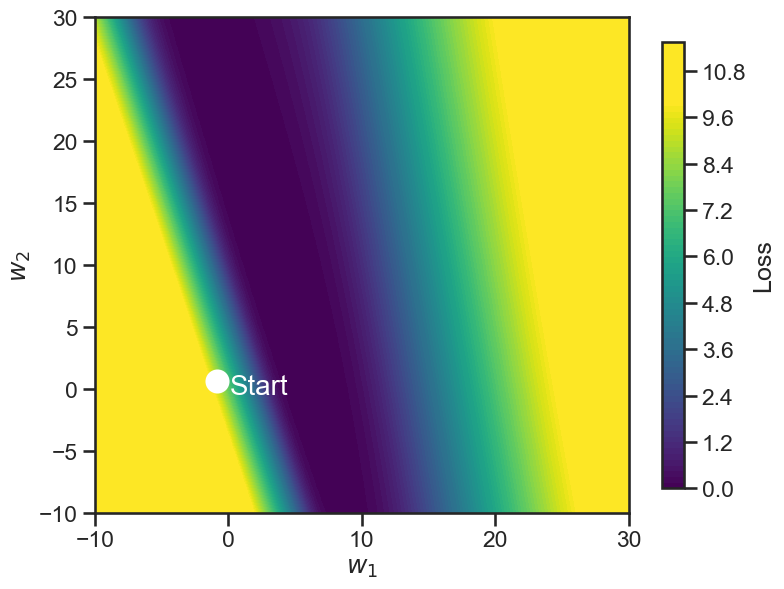

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=100)
# plot contour
cs = ax.contourf(W1, W2, ZZ, 100, vmax=10, cmap=cm.viridis)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# mark start point
ax.scatter(w_start[0], w_start[1], color='white', s=250)
ax.text(w_start[0]+1, w_start[1]-1, 'Start', color='white', fontsize=20)
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-2_Perceptron-Loss.png', dpi=600)

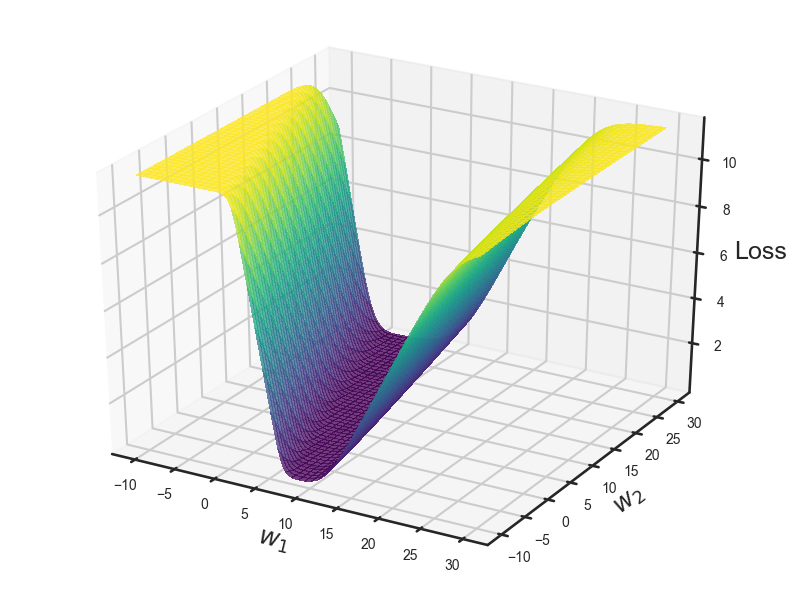

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, ZZ, alpha=0.75, cmap=cm.viridis, 
                linewidth=0, antialiased=False, zorder=-99)
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
ax.set_zlabel('Loss', labelpad=7)
ax.tick_params(labelsize=10)
fig.tight_layout()
fig.savefig('figures/Figure-0-3_Perceptron-Loss-3D.png', dpi=600)

# gradinet descent

[insert figure]

In [28]:
np.random.seed(4321)
perceptron = Perceptron(n_in=2, b=-15)

In [29]:
n_steps = 40000
batch_size = 32

training_loss = np.zeros(n_steps)
training_w = np.zeros((n_steps,2))
for step in tqdm(range(n_steps)):
    batch_idx = np.random.choice(X.shape[0], batch_size, replace=False)
    training_loss[step] = np.mean(perceptron.loss(X[batch_idx], y[batch_idx]))
    training_w[step] = perceptron.w
    perceptron.update_weights(X[batch_idx], y[batch_idx], 1)

100%|██████████| 40000/40000 [00:02<00:00, 15408.64it/s]


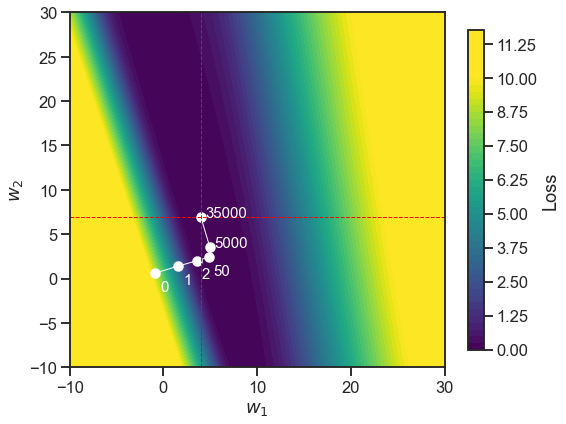

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# plot contour
cs = ax.contourf(W1, W2, ZZ, 50, vmax=10, cmap=cm.viridis)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# plot trajectory
steps = np.array([0,1,2,50,5000,35000])
ax.scatter(training_w[steps,0], training_w[steps,1], color='white')
ax.plot(training_w[steps,0], training_w[steps,1], color='white', lw=1)
for step in steps:
    if step < 100:
        ax.text(training_w[step,0]+0.5, training_w[step,1]-2, step, color='white', fontsize=15)
    else:
        ax.text(training_w[step,0]+0.5, training_w[step,1], step, color='white', fontsize=15)
ax.axvline(training_w[step,0], color='red', lw=1, ls='--')
ax.axhline(training_w[step,1], color='red', lw=1, ls='--')
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-4_Perceptron-Loss-Gradinet-Descent-Path.png', dpi=600)

# decision function

In [31]:
# define the x and y scale
x1grid = np.linspace(0, 6, 50)
x2grid = np.linspace(0, 2, 50)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

In [32]:
zz = perceptron.predict(grid).reshape(xx.shape)

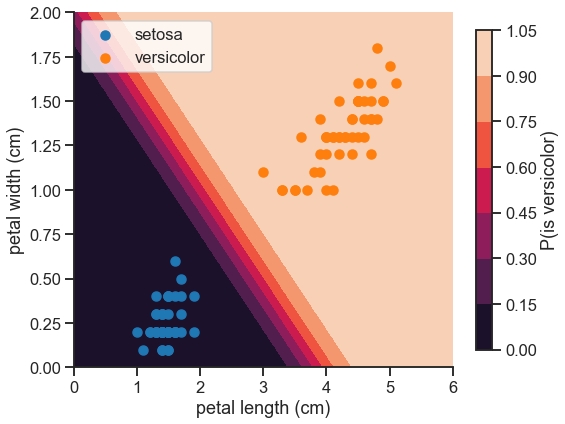

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
cs = ax.contourf(xx,yy,zz)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
cbar.set_label('P(is {})'.format(data['target_names'][1]))
for cl in np.unique(y):
    idx = y==cl
    ax.scatter(x=X[idx,0],
               y=X[idx,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=1)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-5_Perceptron-Decision-Function.png', dpi=600)